# Train data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import minimal_preprocessing, drop_nans_threshold, rename_columns

In [2]:
X, y = minimal_preprocessing()
# X['poverty_score'] = y
X = drop_nans_threshold(X, threshold=0.7)
X = rename_columns(X)

In [3]:
X['read'] = X['read'].eq(1)
X['write'] = X['write'].eq(1)
X['attended_school'] = X['attended_school'].eq(1)

In [4]:
X

,uid,read,write,attended_school,highest_school_lvl,highest_school_lvl_grade,highest_diploma,preschool,now_enrolled,now_not_enroll_reason,...,present_in_past_year,lives_with_mother,mother_education,mother_alive,mother_death_age,mother_age,lives_with_father,father_education,father_alive,father_age
0,441_2_3,True,True,True,2.0,3.0,3.0,0.0,1.0,NaN,...,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,647_7_1,True,True,True,2.0,2.0,2.0,0.0,1.0,NaN,...,1,1,NaN,NaN,NaN,NaN,2,3.0,2.0,63.0
2,756_4_1,True,True,True,2.0,3.0,3.0,0.0,1.0,NaN,...,1,2,3.0,1.0,NaN,44.0,2,3.0,1.0,NaN
3,25_4_3,True,True,True,6.0,1.0,3.0,2.0,1.0,NaN,...,1,1,NaN,NaN,NaN,NaN,2,3.0,2.0,51.0
4,132_6_3,True,True,True,2.0,3.0,3.0,0.0,1.0,NaN,...,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,574_5_1,True,True,True,1.0,4.0,1.0,1.0,2.0,13.0,...,1,2,3.0,1.0,NaN,43.0,2,7.0,1.0,NaN
5330,618_2_1,False,False,True,1.0,4.0,1.0,1.0,2.0,13.0,...,1,2,1.0,1.0,NaN,38.0,2,1.0,1.0,NaN
5331,155_4_1,True,True,True,1.0,8.0,2.0,0.0,2.0,13.0,...,1,2,2.0,1.0,NaN,51.0,2,2.0,1.0,NaN
5332,475_5_1,True,True,True,1.0,8.0,2.0,2.0,2.0,13.0,...,1,2,2.0,1.0,NaN,60.0,2,2.0,1.0,NaN


In [5]:
# Get columns with any NaN values
nan_cols = X.columns[X.isna().any()].tolist()

In [6]:
nan_cols

['highest_school_lvl',
 'highest_school_lvl_grade',
 'highest_diploma',
 'preschool',
 'now_enrolled',
 'now_not_enroll_reason',
 'past_enrolled',
 'past_not_enroll_reason',
 'finish_school_age',
 'less_than_19',
 'lives_with_partner',
 'partner_id_code',
 'mother_education',
 'mother_alive',
 'mother_death_age',
 'mother_age',
 'father_education',
 'father_alive',
 'father_age']

# Now we imputate NaNs

The following columns have NaN values exclusively for people who did not attend school:

* highest_school_lvl
* highest_school_lvl_grade
* highest_diploma
* preschool

so we fill nas with 0 for all of them.

In [7]:
# Proof
cond = X['highest_school_lvl'].isna() & X['attended_school'].eq(True)
assert(len(X.loc[cond]) == 0)  
cond = X['highest_school_lvl_grade'].isna() & X['attended_school'].eq(True)
assert(len(X.loc[cond]) == 0)  
cond = X['highest_diploma'].isna() & X['attended_school'].eq(True)
assert(len(X.loc[cond]) == 0)  
cond = X['preschool'].isna() & X['attended_school'].eq(True)
assert(len(X.loc[cond]) == 0)  

# Fill NaNs with 0
X['highest_school_lvl'] = X['highest_school_lvl'].fillna(0)
X['highest_school_lvl_grade'] = X['highest_school_lvl_grade'].fillna(0)
X['highest_diploma'] = X['highest_diploma'].fillna(0)
X['preschool'] = X['preschool'].fillna(0)


Now focus on imputating these:
* now_enrolled
* now_not_enroll_reason
* past_enrolled
* past_not_enroll_reason

We have the following dependencies: 
* now_enrolled -> now_not_enroll_reason==null
* past_enrolled -> past_not_enroll_reason==null

So we can merge now_enrolled and now_not_enroll_reason into a single categorical variable.





In [8]:
X['now_not_enroll_reason'].describe()

count    5129.000000
mean        9.866251
std         4.876682
min         1.000000
25%         3.000000
50%        13.000000
75%        13.000000
max        14.000000
Name: now_not_enroll_reason, dtype: float64

In [9]:
# Add 'enrolled' as an additional category
X['now_not_enroll_reason'] = X['now_not_enroll_reason'].fillna(15)
X = X.drop(columns=['now_enrolled'])

In [10]:
X['past_not_enroll_reason'].describe()

count    5138.000000
mean        9.955430
std         4.831899
min         1.000000
25%         4.000000
50%        13.000000
75%        13.000000
max        14.000000
Name: past_not_enroll_reason, dtype: float64

In [11]:
# Add 'past_enrolled' as an additional category
X['past_not_enroll_reason'] = X['past_not_enroll_reason'].fillna(15)
X = X.drop(columns=['past_enrolled'])


# Now focus on 
* finish_school_age


In [12]:
cond = X['finish_school_age'].isna() & X['attended_school'].eq(True)
X.loc[cond, ['attended_school', 'finish_school_age', 'highest_school_lvl', 'highest_school_lvl_grade', 'highest_diploma', 'preschool']].head()


,attended_school,finish_school_age,highest_school_lvl,highest_school_lvl_grade,highest_diploma,preschool
0,True,NaN,2.0,3.0,3.0,0.0
1,True,NaN,2.0,2.0,2.0,0.0
2,True,NaN,2.0,3.0,3.0,0.0
3,True,NaN,6.0,1.0,3.0,2.0
4,True,NaN,2.0,3.0,3.0,0.0


In [13]:
X['finish_school_age'].describe()

count    5138.000000
mean       16.041261
std         3.445204
min         6.000000
25%        14.000000
50%        15.000000
75%        18.000000
max        43.000000
Name: finish_school_age, dtype: float64

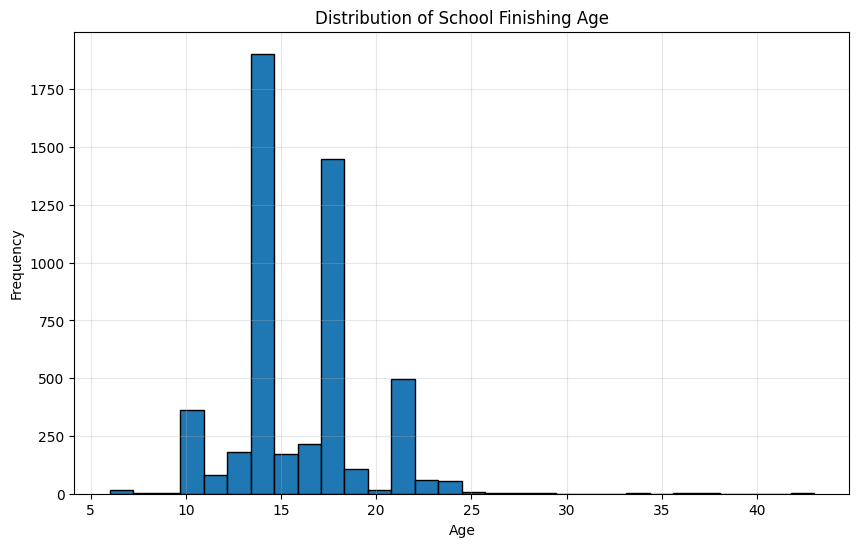

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(X['finish_school_age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of School Finishing Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

The spread is too wide. Minimum is 6 and maximum is 43. It doesn't feel like a standarized question, ie when did you finish high school, or this *specific* diploma. We argue it is too subjective and should be removed.

In [15]:
X = X.drop(columns=['finish_school_age'])


# VAR: less_than_19
We have DOB, age_yrs, age_months, and less_than_19. Only keep age_yrs


In [16]:
X[['DOB', 'age_yrs', 'age_months', 'less_than_19']].head()


,DOB,age_yrs,age_months,less_than_19
0,19930803,19,1,NaN
1,19921216,19,8,NaN
2,19930810,19,2,NaN
3,19920304,20,6,NaN
4,19920411,20,4,NaN


In [17]:
X['age'] = X['age_yrs'] + X['age_months'] / 12
X = X.drop(columns=['age_yrs', 'age_months', 'less_than_19', 'DOB'])


# VAR: lives_with_partner
We will fill Nans with False. This will be accomplished implicitly by using .eq(1)

In [18]:
X['lives_with_partner'] = X['lives_with_partner'].eq(1) # 1 if yes, 2 if no.
assert(X['lives_with_partner'].isna().any() == False)

# VAR: partner_id_code

Random code, not useful for prediction as it carries no meaning.


In [19]:
X = X.drop(columns=['partner_id_code']) 

# VAR: mother_education and father_education
Imputate "Don't know" category for Nans.

In [20]:
X['mother_education'].describe()

count    4885.000000
mean        2.156397
std         1.507863
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: mother_education, dtype: float64

In [21]:
X['father_education'].describe()

count    5119.000000
mean        2.232077
std         1.604403
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: father_education, dtype: float64

In [22]:
X['mother_education'] = X['mother_education'].fillna(11)
X['father_education'] = X['father_education'].fillna(11)


Why sholdn't we imputate with the mean?
because it is a categorical variable, adding means will penalize extreme categories (1 and 10) even if they don't have numerical meaning.

# VAR: mother_alive, father_alive

These are some ***strange cases***. Lives with mother, but unsure if she is alive, her education, age,etc.

In [23]:
X.loc[X['mother_alive'].isna(), ['lives_with_mother', 'mother_education', 'mother_alive', 'mother_death_age', 'mother_age']]


,lives_with_mother,mother_education,mother_alive,mother_death_age,mother_age
0,1,11.0,NaN,NaN,NaN
1,1,11.0,NaN,NaN,NaN
3,1,11.0,NaN,NaN,NaN
4,1,11.0,NaN,NaN,NaN
5,1,11.0,NaN,NaN,NaN
...,...,...,...,...,...
5319,1,11.0,NaN,NaN,NaN
5322,1,11.0,NaN,NaN,NaN
5323,1,11.0,NaN,NaN,NaN
5327,1,11.0,NaN,NaN,NaN


In [24]:
assert(len(X.loc[X['lives_with_mother'].eq(2) & X['mother_alive'].isna()]) == 0)

assert(len(X.loc[X['lives_with_father'].eq(2) & X['father_alive'].isna()]) == 0)



In fact, all  mother_alive==Null have lives_with_mother==1 === TRUE, which leads us to believe that the labels are wrong.


In [25]:
# So for interpretability:
X['lives_with_mother'] = X['lives_with_mother'].eq(2)
X['lives_with_father'] = X['lives_with_father'].eq(2)

X['lives_with_mother'] = X['lives_with_mother'].fillna(False)
X['lives_with_father'] = X['lives_with_father'].fillna(False)


Now we will fill mother_alive Nan's with False

If the mother is not present then she is absent. If she is dead, she is also absent. Not the same thing, could argue for a three value catreogry, but for simplicity. fill with False

In [26]:
X['mother_alive'] = X['mother_alive'].eq(1)
X['father_alive'] = X['father_alive'].eq(1)

X['mother_alive'] = X['mother_alive'].fillna(False)
X['father_alive'] = X['father_alive'].fillna(False)

In [27]:
X[['mother_alive', 'father_alive']].describe()

,mother_alive,father_alive
count,5334,5334
unique,2,2
top,False,False
freq,3233,4013


# VAR: mother_age, mother_death_age



In [28]:
X.columns

Index(['uid', 'read', 'write', 'attended_school', 'highest_school_lvl',
       'highest_school_lvl_grade', 'highest_diploma', 'preschool',
       'now_not_enroll_reason', 'past_not_enroll_reason', 'sex', 'family_role',
       'marital_status', 'lives_with_partner', 'time_away',
       'present_in_past_year', 'lives_with_mother', 'mother_education',
       'mother_alive', 'mother_death_age', 'mother_age', 'lives_with_father',
       'father_education', 'father_alive', 'father_age', 'age'],
      dtype='object')

In [29]:
# Fill age_mother with mother_death_age
X['mother_age'] = X['mother_age'].fillna(X['mother_death_age'])
X = X.drop(columns=['mother_death_age'])




In [30]:
X['mother_age'] = X['mother_age'].fillna(X['mother_age'].mean())
X['father_age'] = X['father_age'].fillna(X['father_age'].mean())

# Finishing touches
present_in_past_year is 1 for all entries, so get rid of it.

In [31]:
X['present_in_past_year'].describe()

count    5334.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: present_in_past_year, dtype: float64

In [32]:
X = X.drop(columns=['present_in_past_year'])

In [33]:
print("highest_school_lvl: ", int(  X['highest_school_lvl'].min()), int(X['highest_school_lvl'].max()))
print("highest_school_lvl_grade: ", int(X['highest_school_lvl_grade'].min()), int(X['highest_school_lvl_grade'].max()))
print("highest_diploma: ", int(X['highest_diploma'].min()), int(X['highest_diploma'].max()))
print("now_not_enroll_reason: ", int(X['now_not_enroll_reason'].min()), int(X['now_not_enroll_reason'].max()))
print("past_not_enroll_reason: ", int(X['past_not_enroll_reason'].min()), int(X['past_not_enroll_reason'].max()))
print("family_role: ", int(X['family_role'].min()), int(X['family_role'].max()))
print("marital_status: ", int(X['marital_status'].min()), int(X['marital_status'].max()))
print("mother_education: ", int(X['mother_education'].min()), int(X['mother_education'].max()))
print("father_education: ", int(X['father_education'].min()), int(X['father_education'].max()))

# boolean conversion
print("lives_with_partner: ", int(X['lives_with_partner'].min()), int(X['lives_with_partner'].max()))
print("lives_with_father: ", int(X['lives_with_father'].min()), int(X['lives_with_father'].max()))
print("lives_with_mother: ", int(X['lives_with_mother'].min()), int(X['lives_with_mother'].max()))






highest_school_lvl:  0 10
highest_school_lvl_grade:  0 9
highest_diploma:  0 11
now_not_enroll_reason:  1 15
past_not_enroll_reason:  1 15
family_role:  1 10
marital_status:  1 5
mother_education:  1 11
father_education:  1 11
lives_with_partner:  0 1
lives_with_father:  0 1
lives_with_mother:  0 1


In [34]:
X.columns

Index(['uid', 'read', 'write', 'attended_school', 'highest_school_lvl',
       'highest_school_lvl_grade', 'highest_diploma', 'preschool',
       'now_not_enroll_reason', 'past_not_enroll_reason', 'sex', 'family_role',
       'marital_status', 'lives_with_partner', 'time_away',
       'lives_with_mother', 'mother_education', 'mother_alive', 'mother_age',
       'lives_with_father', 'father_education', 'father_alive', 'father_age',
       'age'],
      dtype='object')

In [35]:
# Ensure there are no NaNs left
for col in X.columns:
    assert(X[col].isna().sum() == 0)

In [36]:

# correct type
X['preschool'] = X['preschool'].astype(int)
X['sex'] = X['sex'].astype(int)
X['time_away'] = X['time_away'].astype(int)
X['mother_age'] = X['mother_age'].astype(int)
X['father_age'] = X['father_age'].astype(int)
X['age'] = X['age'].astype(int)

# Handle categories
X['highest_school_lvl'] = pd.Categorical(X['highest_school_lvl'], categories=range(0, 11))
X['highest_school_lvl_grade'] = pd.Categorical(X['highest_school_lvl_grade'], categories=range(0, 10))
X['highest_diploma'] = pd.Categorical(X['highest_diploma'], categories=range(0, 12))
X['now_not_enroll_reason'] = pd.Categorical(X['now_not_enroll_reason'], categories=range(1,16))
X['past_not_enroll_reason'] = pd.Categorical(X['past_not_enroll_reason'], categories=range(1,16))
X['family_role'] = pd.Categorical(X['family_role'], categories=range(1, 11))
X['marital_status'] = pd.Categorical(X['marital_status'], categories=range(1, 6))
X['mother_education'] = pd.Categorical(X['mother_education'], categories=range(1, 12))
X['father_education'] = pd.Categorical(X['father_education'], categories=range(1, 12))
## One-hot encoding
categorical_columns = [
    'highest_school_lvl',
    'highest_school_lvl_grade',
    'highest_diploma',
    'now_not_enroll_reason',
    'past_not_enroll_reason',
    'family_role',
    'marital_status',
    'mother_education',
    'father_education'
]
dummies = pd.get_dummies(X, columns=categorical_columns)
X = pd.concat([X, pd.get_dummies(X[categorical_columns])], axis=1)
X = X.drop(columns=categorical_columns)



# boolean conversion
X['lives_with_partner'] = X['lives_with_partner'].eq(1)
X['lives_with_father'] = X['lives_with_father'].eq(1)
X['lives_with_mother'] = X['lives_with_mother'].eq(1)





In [50]:
X.to_csv('data/processed/X_processed.csv', index=False)


In [37]:
# Ensure there are no NaNs left
for col in X.columns:
    assert(X[col].isna().sum() == 0)


In [38]:
# Prepare X and y for model trainig 
X = X.drop(columns=['uid'])
y['poverty_score'] = y['poverty_score'].astype(int)
y['poverty_score'] = pd.Categorical(y['poverty_score'], categories=range(1, 11))
y = y.drop(columns=['uid'])

In [39]:
X

,read,write,attended_school,preschool,sex,lives_with_partner,time_away,lives_with_mother,mother_alive,mother_age,...,father_education_2,father_education_3,father_education_4,father_education_5,father_education_6,father_education_7,father_education_8,father_education_9,father_education_10,father_education_11
0,True,True,True,0,1,False,0,False,False,71,...,False,False,False,False,False,False,False,False,False,True
1,True,True,True,0,1,False,0,False,False,71,...,False,True,False,False,False,False,False,False,False,False
2,True,True,True,0,2,False,0,True,True,44,...,False,True,False,False,False,False,False,False,False,False
3,True,True,True,2,1,False,0,False,False,71,...,False,True,False,False,False,False,False,False,False,False
4,True,True,True,0,1,False,0,False,False,71,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,True,True,True,1,1,True,0,True,True,43,...,False,False,False,False,False,True,False,False,False,False
5330,False,False,True,1,2,False,0,True,True,38,...,False,False,False,False,False,False,False,False,False,False
5331,True,True,True,0,1,True,0,True,True,51,...,True,False,False,False,False,False,False,False,False,False
5332,True,True,True,2,1,True,0,True,True,60,...,True,False,False,False,False,False,False,False,False,False


# Model training

In [40]:
from models import *
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


In [41]:
rf = random_forest(X, y['poverty_score'])

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation accuracy: 0.20


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation accuracy: 0.20

In [42]:
hgb = hist_grad_boost(X, y['poverty_score'])

Best parameters: {'l2_regularization': 2.0, 'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 50}
Best cross-validation accuracy: 0.20


Best parameters: {'l2_regularization': 2.0, 'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 100, 'min_samples_leaf': 50}
Best cross-validation accuracy: 0.20


In [43]:
logreg = log_reg(X, y['poverty_score'])

/Users/juanbello/Desktop/projects/Classification/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/juanbello/Desktop/projects/Classification/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/juanbello/Desktop/projects/Classification/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  w

Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.21


Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy: 0.21

In [44]:
nn = neural_network(X, y['poverty_score'])

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'solver': 'sgd'}
Best cross-validation accuracy: 0.21


Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 1000, 'solver': 'sgd'}
Best cross-validation accuracy: 0.21

In [45]:
knn = knn_classifier(X, y['poverty_score'])

Best parameters: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation accuracy: 0.17


In [52]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=150, random_state=42)

In [53]:
estimators = [
    ('knn', knn),
    ('hgb', hgb),
    ('nn', nn),
    ('logreg', logreg),
    ('rf', rf)
]

stacked_model = stacking(X, y['poverty_score'], estimators)

Stacked model cross-validation accuracy: 0.21 (+/- 0.02)


Stacked model cross-validation accuracy: 0.21 (+/- 0.02)